In [2]:
#importing necessary libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

In [59]:
#for all columns visualization
pd.set_option("display.max_columns", None) 

In [607]:
#let import train and test dataset for pre processing & feature engineering

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [608]:
df_train.shape

(1460, 81)

In [609]:
df_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [610]:
nan_features = [feature for feature in df_train.columns if df_train[feature].isnull().sum()]
print(nan_features)  #features list having nan values

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [611]:
num_features = [feature for feature in df_train.columns if df_train[feature].dtype !='O']
cat_features = [feature for feature in df_train.columns if df_train[feature].dtype =='O']

In [612]:
#sum of nan in nan_features
df_train[nan_features].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [613]:
cat_nan_features = [feature for feature in df_train[nan_features] if df_train[feature].dtype =='O']

In [614]:
num_nan_features = [feature for feature in df_train[nan_features] if df_train[feature].dtype !='O']

In [615]:
num_nan_features

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [616]:
len(cat_nan_features)

16

In [617]:
df_train.shape

(1460, 81)

In [70]:
df_train['LotFrontage'].median()

69.0

In [71]:
df_train.LotFrontage.median()

69.0

Text(0.5, 1.0, 'Histogram of MasVnrArea before imputation')

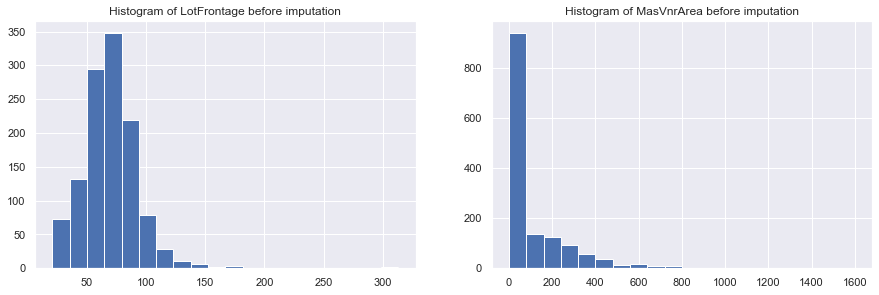

In [618]:
#plotting subplots for num_nan_features before median imputation to see the distribution
plt.rcParams['figure.figsize']=(15,10)
plt.subplot(2,2,1)
plt.hist(df_train['LotFrontage'], bins =20, )  #it is skewed need to be log normalized
plt.title("Histogram of LotFrontage before imputation")

plt.subplot(2,2,2)
plt.hist(df_train['MasVnrArea'], bins =20)  #it is skewed need to be log normalized
plt.title("Histogram of MasVnrArea before imputation")


<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

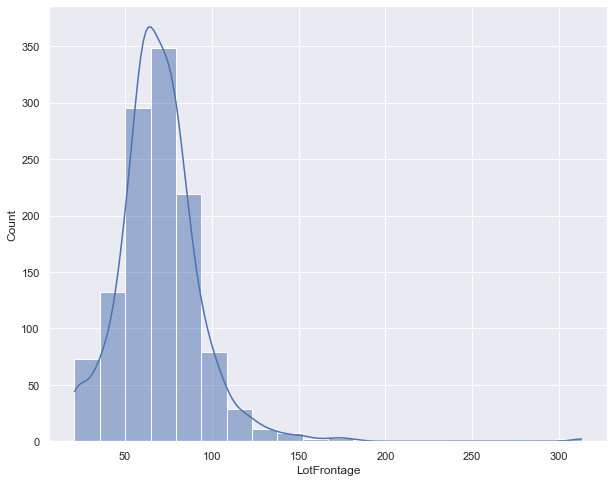

In [620]:
plt.rcParams['figure.figsize']=(10,8)
sns.histplot(df_train['LotFrontage'], kde =True, bins =20)

In [621]:
df_train[num_nan_features].isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [75]:
'''def impute_nan_num(df_train,variable,median):
   
    median=df_train[variable].median()
    df_train[variable+"_median"]=df_train[variable].fillna(median)
impute_nan_num(df_train,'LotFrontage',df_train['LotFrontage'].median())
df_train.head()'''

Distribution before and after Median imputation


'the median imputation does not give us proper distribution \ndistorted in LotFrontage and skewed as before fot MasVnrArea so lets check Random value imputation'

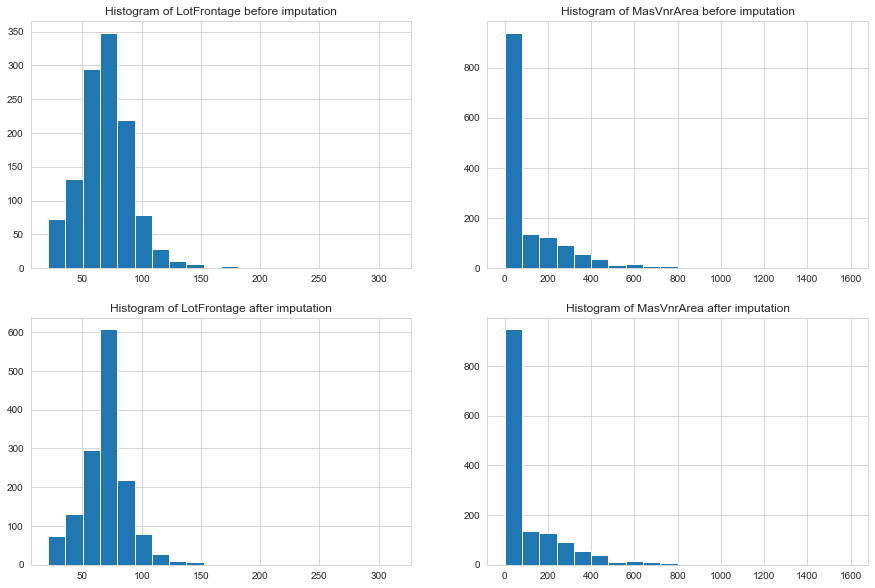

In [82]:
'''print("Distribution before and after Median imputation")

#plotting subplots for num_nan_features before median imputation to see the distribution
plt.rcParams['figure.figsize']=(15,10)
plt.subplot(2,2,1)
plt.hist(df_train['LotFrontage'], bins =20, )  #it is skewed need to be log normalized
plt.title("Histogram of LotFrontage before imputation")

plt.subplot(2,2,2)
plt.hist(df_train['MasVnrArea'], bins =20)  #it is skewed need to be log normalized
plt.title("Histogram of MasVnrArea before imputation")

#plotting subplots for num_nan_features before median imputation to see the distribution
plt.rcParams['figure.figsize']=(15,10)
plt.subplot(2,2,3)
plt.hist(df_train['LotFrontage_median'], bins =20, )  #it is skewed need to be log normalized
plt.title("Histogram of LotFrontage after imputation")

plt.subplot(2,2,4)
plt.hist(df_train['MasVnrArea_median'], bins =20)  #it is skewed need to be log normalized
plt.title("Histogram of MasVnrArea after imputation")
'''

'''the median imputation does not give us proper distribution 
distorted in LotFrontage and skewed as before fot MasVnrArea so lets check Random value imputation'''

In [622]:
# Random sample imputation note this just for display yet not imputed.
#print(df_train['LotFrontage'].dropna().sample(df_train['LotFrontage'].isnull().sum(),random_state=0))
#print(df_train['MasVnrArea'].dropna().sample(df_train['MasVnrArea'].isnull().sum(),random_state=0))

In [631]:
#applying random imputation
def impute_nan_num(df_train,variable,median):
    median = df_train[variable].median()
    df_train[variable+"_median"]=df_train[variable].fillna(median)     #if want to do both using single function
    df_train[variable+"_random"]=df_train[variable]
    ##It will have the random sample to fill the na
    random_sample=df_train[variable].dropna().sample(df_train[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df_train[df_train[variable].isnull()].index
    df_train.loc[df_train[variable].isnull(),variable+'_random']=random_sample
for feature in ['LotFrontage', 'MasVnrArea']:
    impute_nan_num(df_train,feature, df_train[feature].median())

In [633]:
df_train.shape      # 4 new column created 

(1460, 85)

In [632]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [626]:
print(df_train['MasVnrArea_random'].isnull().sum())
print(df_train['LotFrontage_random'].isnull().sum())

0
0


Distribution before and after Random value imputation


'the median imputation does not give us proper distribution \ndistorted in LotFrontage and skewed as before fot MasVnrArea so lets check Random value imputation'

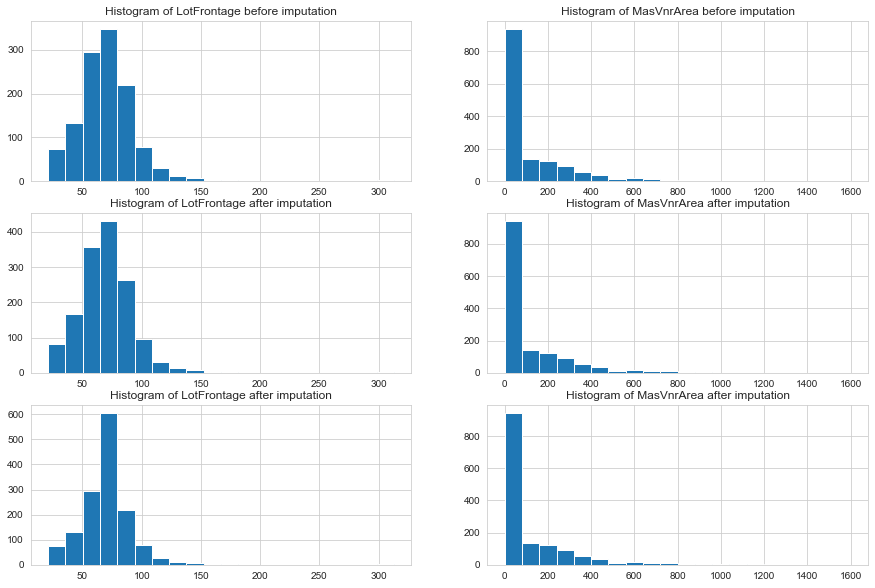

In [87]:
#now check the distribution again 

print("Distribution before and after Random value imputation")

#plotting subplots for num_nan_features before median imputation to see the distribution
plt.rcParams['figure.figsize']=(15,10)
plt.subplot(3,2,1)
plt.hist(df_train['LotFrontage'], bins =20, )  #it is skewed need to be log normalized
plt.title("Histogram of LotFrontage before imputation")

plt.subplot(3,2,2)
plt.hist(df_train['MasVnrArea'], bins =20)  #it is skewed need to be log normalized
plt.title("Histogram of MasVnrArea before imputation")

#plotting subplots for num_nan_features before median imputation to see the distribution
plt.rcParams['figure.figsize']=(15,10)
plt.subplot(3,2,3)
plt.hist(df_train['LotFrontage_random'], bins =20, )  #it is skewed need to be log normalized
plt.title("Histogram of LotFrontage after imputation")

plt.subplot(3,2,4)
plt.hist(df_train['MasVnrArea_random'], bins =20)  #it is skewed need to be log normalized
plt.title("Histogram of MasVnrArea after imputation")

''' random not distorts the Lotfrontage distribution hence we consider this method'''

#plotting subplots for num_nan_features before median imputation to see the distribution
plt.rcParams['figure.figsize']=(15,10)
plt.subplot(3,2,5)
plt.hist(df_train['LotFrontage_median'], bins =20, )  #it is skewed need to be log normalized
plt.title("Histogram of LotFrontage after imputation")

plt.subplot(3,2,6)
plt.hist(df_train['MasVnrArea_median'], bins =20)  #it is skewed need to be log normalized
plt.title("Histogram of MasVnrArea after imputation")


'''the median imputation does not give us proper distribution 
distorted in LotFrontage and skewed as before fot MasVnrArea so lets check Random value imputation'''

In [635]:
#handling Year features
year_features = [feature for feature in num_features if 'Yr' in feature or 'Year' in feature]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [636]:
df_B1 = df_train.copy(deep=True)

In [637]:
for feature in year_features: 
    if year_features != 'YrSold':
        df_train[feature]=df_train['YrSold'] - df_train[feature]

In [638]:
df_train[year_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,0
1,31,31,31.0,0
2,7,6,7.0,0
3,91,36,8.0,0
4,8,8,8.0,0


In [91]:
df_train[year_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,0
1,31,31,31.0,0
2,7,6,7.0,0
3,91,36,8.0,0
4,8,8,8.0,0


In [639]:
df_train['YrSold']=df_train.replace(df_B1['YrSold'])

In [640]:
df_train[year_features].head(2)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2007
1,31,31,31.0,2008


In [641]:
#replacing yr sold by the differnce of current year 2021

df_train['YrSold']=2021- df_train['YrSold']

In [642]:
df_train[year_features].head(2)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,14
1,31,31,31.0,13


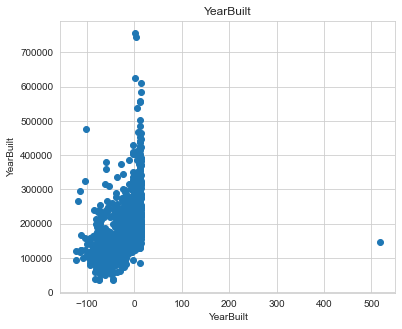

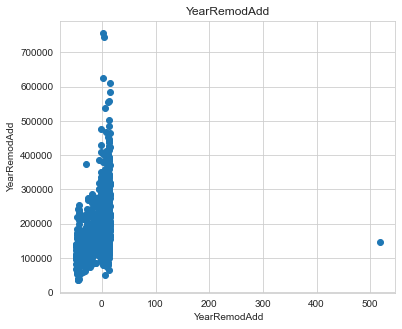

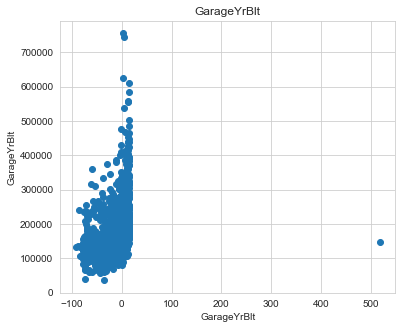

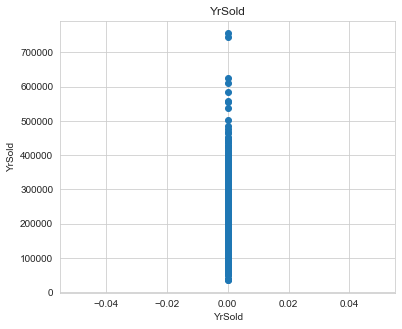

In [95]:
for feature in year_features:
    if year_features != 'YrSold':
        df1=df_train.copy()       #copied to not effect my working dataframe df_train
        df1[feature]=df1['YrSold'] - df1[feature]
        plt.figure(figsize=(6,5))
        plt.scatter(df1[feature], df1['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [97]:
df_train[year_features].isnull().sum()

YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
YrSold           0
dtype: int64

Text(0, 0.5, 'SalePrice')

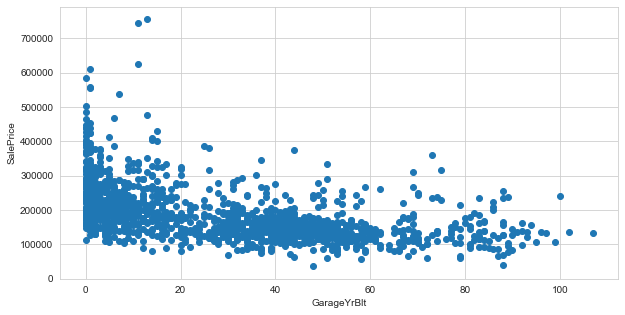

In [98]:
plt.rcParams['figure.figsize']=(10,5)
plt.scatter(x=df_train['GarageYrBlt'], y=df_train['SalePrice'])
plt.xlabel("GarageYrBlt")
plt.ylabel("SalePrice")

In [643]:
print(df_train['GarageYrBlt'].mean())
print(df_train['GarageYrBlt'].median())
#print(df_train['GarageYrBlt'].dropna().sample(df_train['GarageYrBlt'].isnull().sum(), random_state=0))
print(df_train[df_train['GarageYrBlt'].isnull()].index)

29.306018854242204
28.0
Int64Index([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
             155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
             386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
             562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
             738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
             976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
            1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
            1407, 1449, 1450, 1453],
           dtype='int64')


In [100]:
df_train['GarageYrBlt'].isnull()[39] #this shows that at 39 index has nan value

True

In [647]:
#imputing GarageYrBlt in new columns by median and randon value to see effect on saleprice using scatter
def impute_nan_garageyrblt(df_train,variable,median):
    median = df_train['GarageYrBlt'].median()
    df_train[variable+"_median"]=df_train[variable].fillna(median) #if want to do both using single function
    df_train[variable+"_random"]=df_train[variable]
    ##It will have the random sample to fill the na
    random_sample=df_train[variable].dropna().sample(df_train[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df_train[df_train[variable].isnull()].index
    df_train.loc[df_train[variable].isnull(),variable+'_random']=random_sample
impute_nan_garageyrblt(df_train, 'GarageYrBlt', df_train['GarageYrBlt'].median())

In [646]:
#print('shape before imputation of garage yr blt: {}'.format(df_train.shape))


shape before imputation of garage yr blt: (1460, 85)


In [648]:
print('shape after imputation of garage yr blt: {}'.format(df_train.shape))

shape after imputation of garage yr blt: (1460, 87)


 Before and After imputation the median and random value for GarageYrBlt feature on saleprice


'both type of imputation are almost same effect on saleprice yet consider random again therefore.'

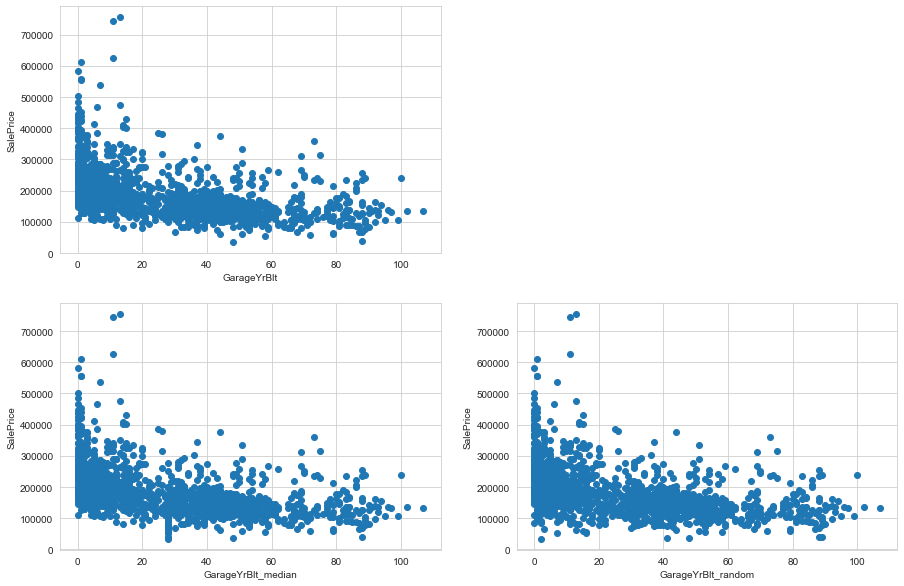

In [104]:
print(" Before and After imputation the median and random value for GarageYrBlt feature on saleprice")
plt.rcParams['figure.figsize']=(15,10)
plt.subplot(2,2,1)
plt.scatter(x=df_train['GarageYrBlt'], y=df_train['SalePrice'])
plt.xlabel("GarageYrBlt")
plt.ylabel("SalePrice")

plt.rcParams['figure.figsize']=(15,10)
plt.subplot(2,2,3)
plt.scatter(x=df_train['GarageYrBlt_median'], y=df_train['SalePrice'])
plt.xlabel("GarageYrBlt_median")
plt.ylabel("SalePrice")

plt.rcParams['figure.figsize']=(15,10)
plt.subplot(2,2,4)
plt.scatter(x=df_train['GarageYrBlt_random'], y=df_train['SalePrice'])
plt.xlabel("GarageYrBlt_random")
plt.ylabel("SalePrice")

'''both type of imputation are almost same effect on saleprice yet consider random again therefore.'''

In [105]:
#imputed numerical categories.
df_train.to_csv('dfnum_imputed.csv', index = False)

# Handling Categorical features 

In [650]:
df_B2 = df_train.copy(deep=True)

In [651]:
df_train.shape

(1460, 87)

In [690]:
cat_features = [feature for feature in df_train.columns if df_train[feature].dtype =='O']

In [687]:
to convert from object to int data type
#df_train['YrSold'] = pd.to_numeric(df_train['YrSold'])

In [688]:
df_train['YrSold'].dtype

dtype('int64')

In [692]:
cat_nan = [feature for feature in cat_features if df_train[feature].isnull().sum()>0]

In [693]:
cat_nan

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [63]:
df_train.shape

(1460, 87)

In [695]:
df_train[cat_nan].isnull().sum()

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [694]:
df_train[cat_nan].columns

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [696]:
# Replace cat_nan features where counts are less than by Mode.
#replacing cat_nan features whose null count is less than 100 using mode, new column created 
df_cat=df_train.copy()
def impute_nan_cat1(df_train,var,mode):
    mode = df_train[var].mode()[0]
    df_train[var+"mode"]=df_train[var].fillna(mode)
for feature in cat_nan:
    if df_train[feature].isnull().sum()<100:
        impute_nan_cat1(df_train,feature,df_train[feature].mode()[0])   

In [697]:
df_train.shape

(1460, 98)

In [699]:
df_train.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_random,MasVnrArea_random,LotFrontage_median,MasVnrArea_median,GarageYrBlt_median,GarageYrBlt_random,MasVnrTypemode,BsmtQualmode,BsmtCondmode,BsmtExposuremode,BsmtFinType1mode,BsmtFinType2mode,Electricalmode,GarageTypemode,GarageFinishmode,GarageQualmode,GarageCondmode
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,14,WD,Normal,208500,65.0,196.0,65.0,196.0,5.0,5.0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA


In [705]:
#Higher Nan values in count are replace with new var "Missing"

#df_cat2=df_train.copy()
def impute_nan_cat2(df_train,variable):
    
    df_train[variable+"_newvar"]=np.where(df_train[variable].isnull(),"Missing",df_train[variable])
    
for feature in ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']:
    impute_nan_cat2(df_train,feature)

In [706]:
df_train.shape

(1460, 103)

In [715]:
df_train.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_random,MasVnrArea_random,LotFrontage_median,MasVnrArea_median,GarageYrBlt_median,GarageYrBlt_random,MasVnrTypemode,BsmtQualmode,BsmtCondmode,BsmtExposuremode,BsmtFinType1mode,BsmtFinType2mode,Electricalmode,GarageTypemode,GarageFinishmode,GarageQualmode,GarageCondmode,Alley_newvar,FireplaceQu_newvar,PoolQC_newvar,Fence_newvar,MiscFeature_newvar
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,14,WD,Normal,208500,65.0,196.0,65.0,196.0,5.0,5.0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,Missing,Missing,Missing,Missing,Missing


In [720]:
#dropping not req columns (nan)using only modified new columns
df_1 = df_train.copy()
df_train = df_train.dropna(axis = 1)

df_train.shape

(1460, 84)

In [721]:
#keeping random imputation and droping median columns

df_train = df_train.drop(['LotFrontage_median', 'GarageYrBlt_median', 'MasVnrArea_median'], axis =1)  

In [722]:
df_train.shape

(1460, 81)

In [724]:
#backup in working directory
df_train.to_csv('df_train_imputed.csv', index = False)

### Now to convert categorical data into numerical using encoding

In [726]:
#now lets seperate categorical data in form of list from dataset.

s=(df_train.dtypes=='object')
object_cols=list(s[s].index)
print("Categorical variables: {}".format(object_cols))

Categorical variables: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition', 'MasVnrTypemode', 'BsmtQualmode', 'BsmtCondmode', 'BsmtExposuremode', 'BsmtFinType1mode', 'BsmtFinType2mode', 'Electricalmode', 'GarageTypemode', 'GarageFinishmode', 'GarageQualmode', 'GarageCondmode', 'Alley_newvar', 'FireplaceQu_newvar', 'PoolQC_newvar', 'Fence_newvar', 'MiscFeature_newvar']


In [727]:
df_train.head(1)


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_random,MasVnrArea_random,GarageYrBlt_random,MasVnrTypemode,BsmtQualmode,BsmtCondmode,BsmtExposuremode,BsmtFinType1mode,BsmtFinType2mode,Electricalmode,GarageTypemode,GarageFinishmode,GarageQualmode,GarageCondmode,Alley_newvar,FireplaceQu_newvar,PoolQC_newvar,Fence_newvar,MiscFeature_newvar
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,14,WD,Normal,208500,65.0,196.0,5.0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,Missing,Missing,Missing,Missing,Missing


In [728]:
for feature in object_cols:
    print("{}: unique vales are: {} and no. are: {}" .format(feature,df_train[feature].unique(), 
                                                             len(df_train[feature].unique())))
    
    #this is used to check which kind of encoding can be applied to features

MSZoning: unique vales are: ['RL' 'RM' 'C (all)' 'FV' 'RH'] and no. are: 5
Street: unique vales are: ['Pave' 'Grvl'] and no. are: 2
LotShape: unique vales are: ['Reg' 'IR1' 'IR2' 'IR3'] and no. are: 4
LandContour: unique vales are: ['Lvl' 'Bnk' 'Low' 'HLS'] and no. are: 4
Utilities: unique vales are: ['AllPub' 'NoSeWa'] and no. are: 2
LotConfig: unique vales are: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] and no. are: 5
LandSlope: unique vales are: ['Gtl' 'Mod' 'Sev'] and no. are: 3
Neighborhood: unique vales are: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] and no. are: 25
Condition1: unique vales are: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] and no. are: 9
Condition2: unique vales are: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] and no. are: 8


In [117]:
for feature in object_cols:
    print("{} Value Counts: {}" .format(feature,df_train[feature].value_counts())) 
                                                             
#this to check the if counts are same for some categories type , Neighbourhood feature two category has same count 25
#so we neither use frequecy count encoding nor one hot.

MSZoning Value Counts: RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Street Value Counts: Pave    1454
Grvl       6
Name: Street, dtype: int64
Alley Value Counts: Grvl    50
Pave    41
Name: Alley, dtype: int64
LotShape Value Counts: Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
LandContour Value Counts: Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Utilities Value Counts: AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig Value Counts: Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
LandSlope Value Counts: Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Neighborhood Value Counts: NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel  

In [116]:
#saving this file as a csv for backup
#df_train.to_csv('dfbackup.csv', index = False)

In [729]:
df_train.shape

(1460, 81)

In [730]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'LotFrontage_random', 'MasVnrArea_random',
       'GarageYrBlt_random',

In [731]:
df_train = df_train.rename(columns = {'LotFrontage_random':'LotFrontage', 'MasVnrArea_random': 'MasVnrArea',
       'GarageYrBlt_random': 'GarageYrBlt', 'MasVnrTypemode': 'MasVnrType', 'BsmtQualmode':'BsmtQual', 'BsmtCondmode':'BsmtCond',
       'BsmtExposuremode':'BsmtExposure', 'BsmtFinType1mode':'BsmtFinType1', 'BsmtFinType2mode':'BsmtFinType2',
       'Electricalmode':'Electrical', 'GarageTypemode':'GarageType', 'GarageFinishmode':'GarageFinish',
       'GarageQualmode': 'GarageQual', 'GarageCondmode':'GarageCond', 'Alley_newvar':'Alley',
       'FireplaceQu_newvar':'FireplaceQu', 'PoolQC_newvar':'PoolQC', 'Fence_newvar':'Fence',
       'MiscFeature_newvar':'MiscFeature'})

In [732]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'LotFrontage', 'MasVnrArea',
       'GarageYrBlt', 'MasVnrType', 'BsmtQ

# Handling Skewed feature and Encoding of categorical data
### so we first keep numerical seperate and object data seperate in new variables

##### for normalization we will check the distribution in num_cols (for random forest not required)

In [733]:
df_train.head(1)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage,MasVnrArea,GarageYrBlt,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond,Alley,FireplaceQu,PoolQC,Fence,MiscFeature
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,14,WD,Normal,208500,65.0,196.0,5.0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,Missing,Missing,Missing,Missing,Missing


In [734]:
obj_cols = (df_train.select_dtypes(include ='object').columns)

In [735]:
num_cols = (df_train.select_dtypes(exclude ='object').columns)

In [736]:
df_train[num_cols].shape  #after imputation of Nan

(1460, 38)

In [737]:
df_train[obj_cols].shape

(1460, 43)

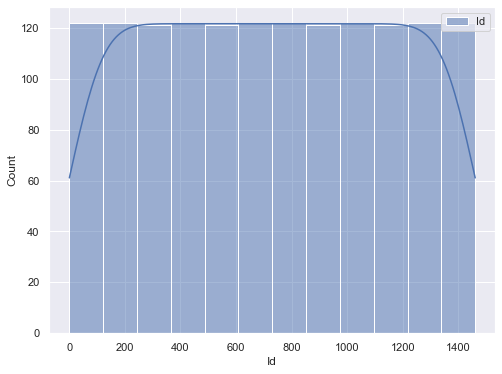

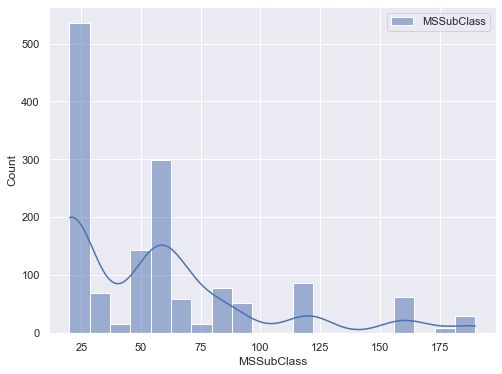

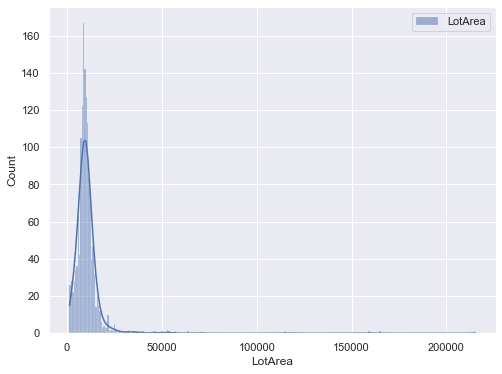

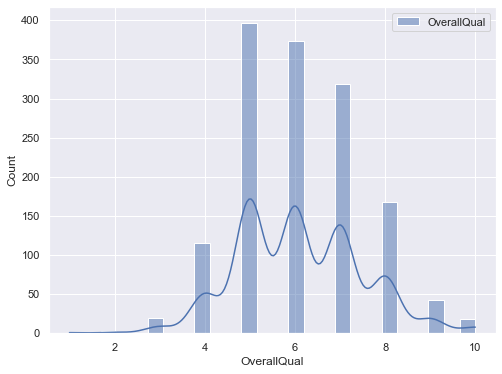

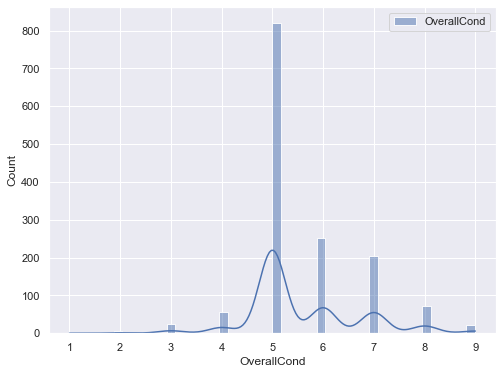

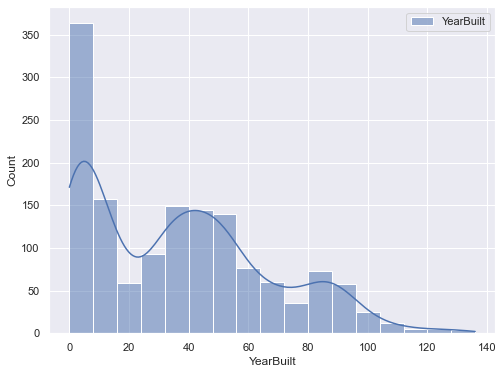

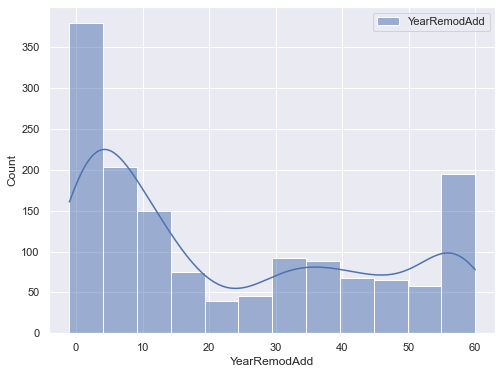

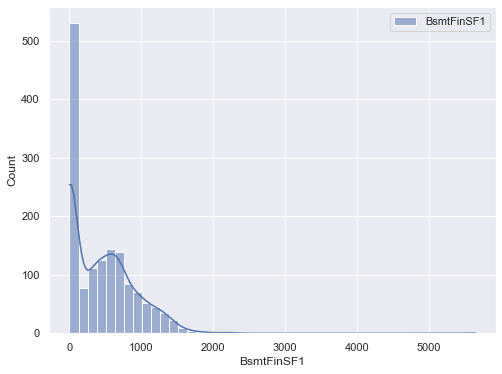

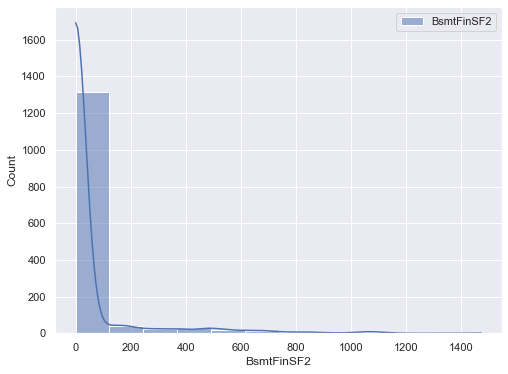

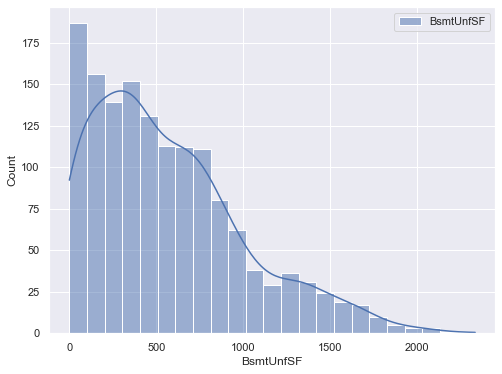

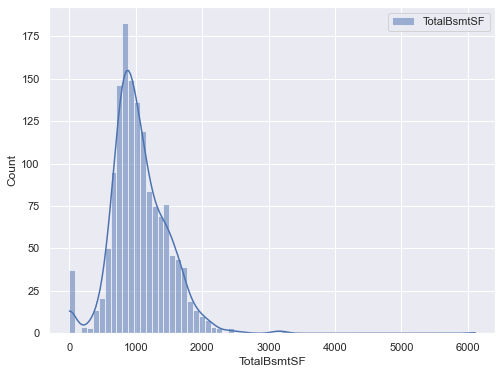

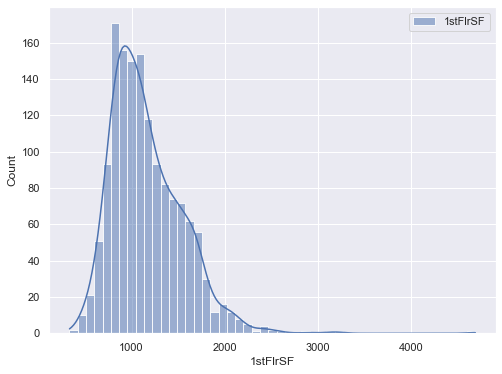

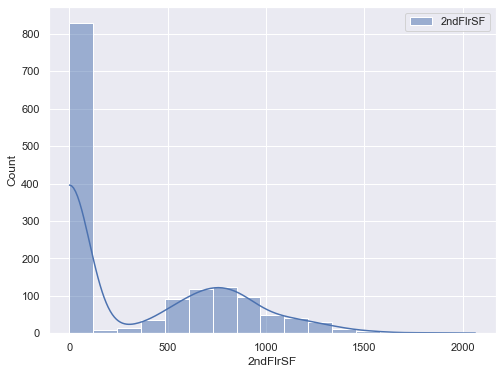

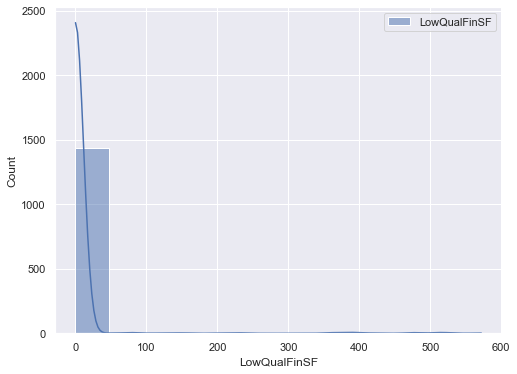

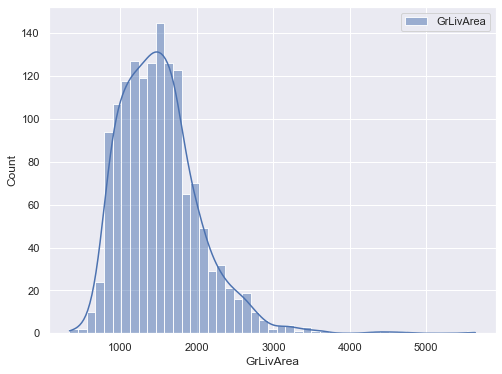

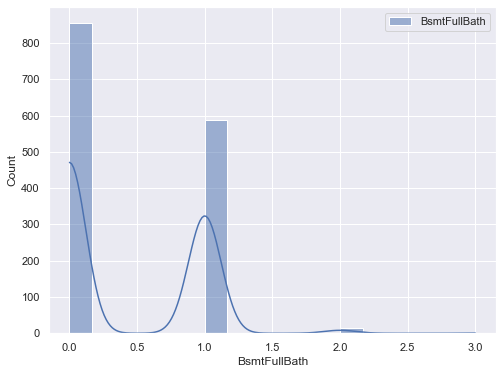

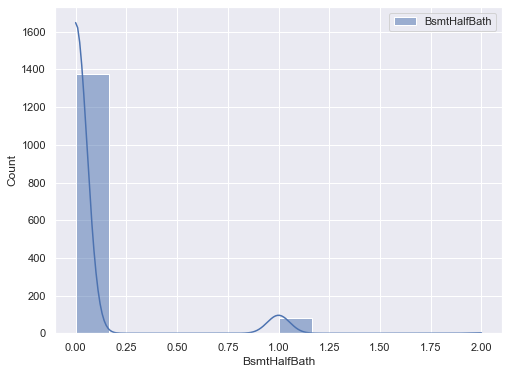

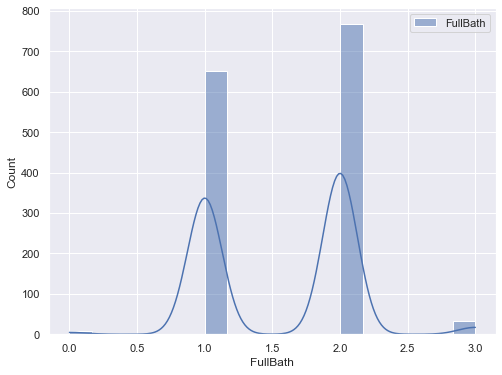

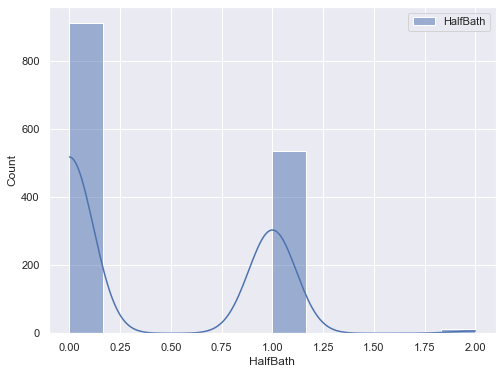

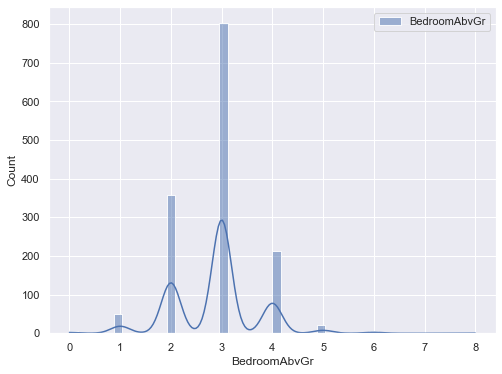

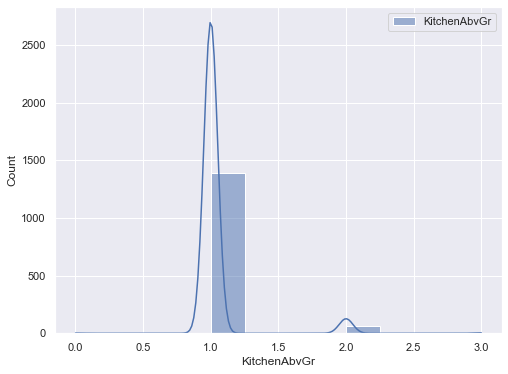

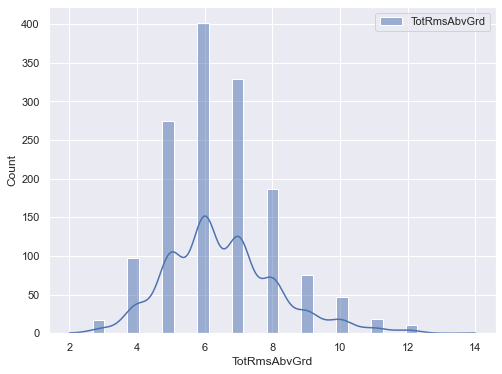

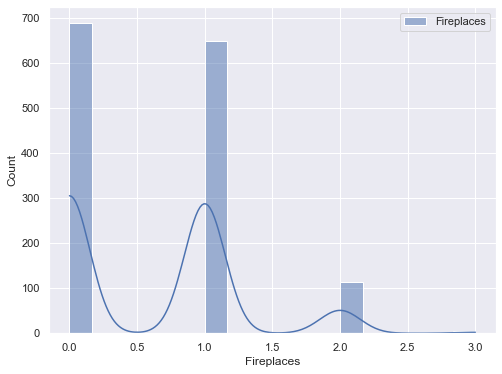

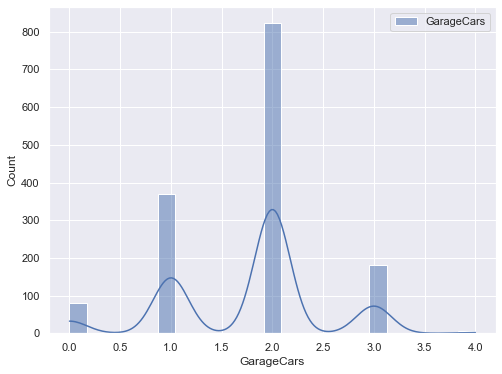

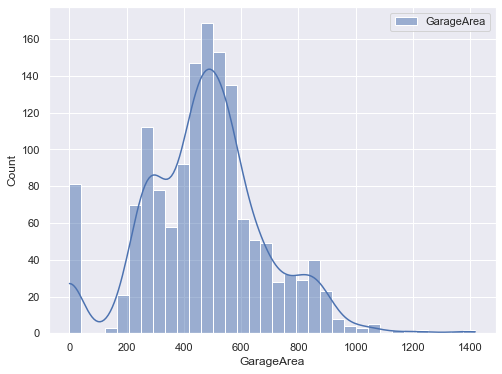

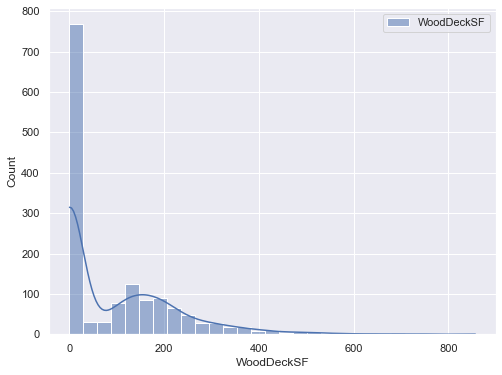

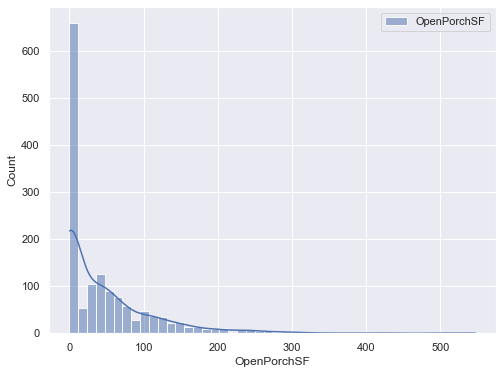

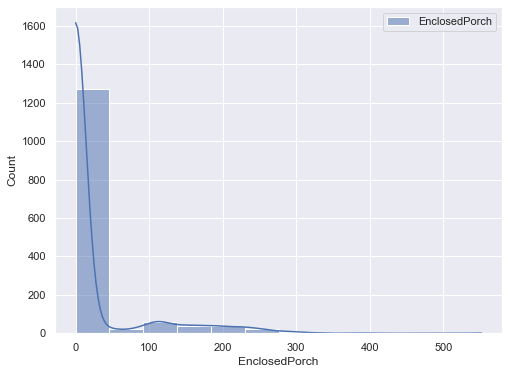

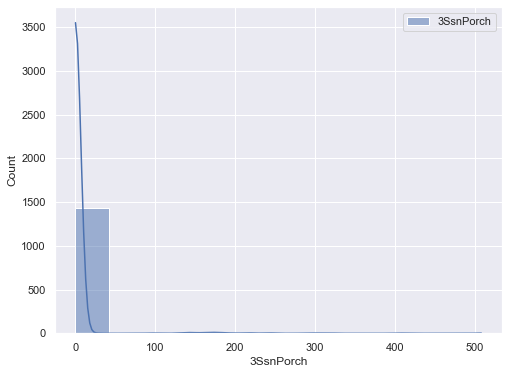

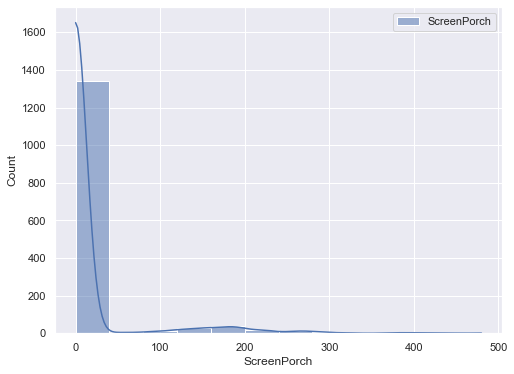

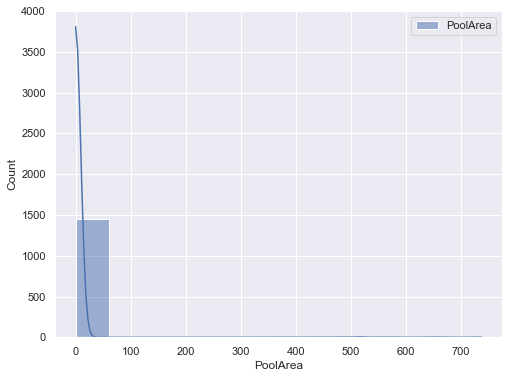

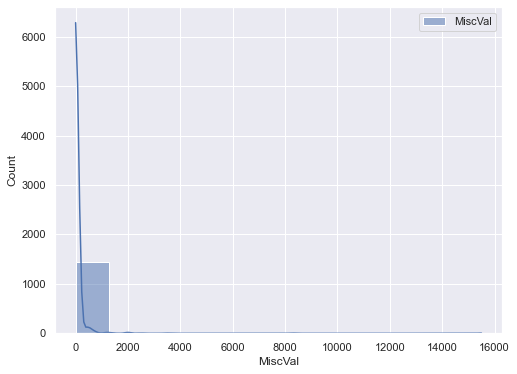

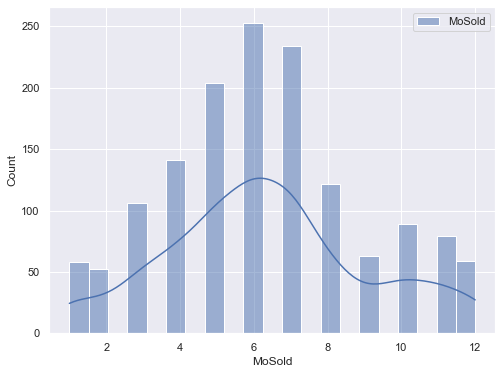

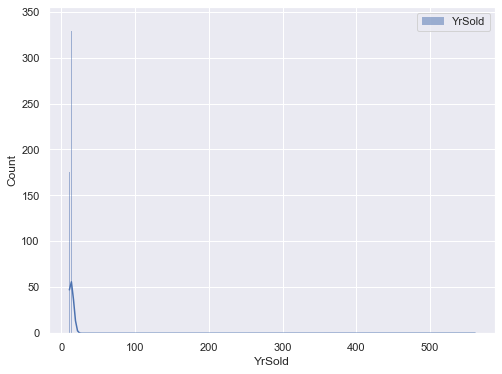

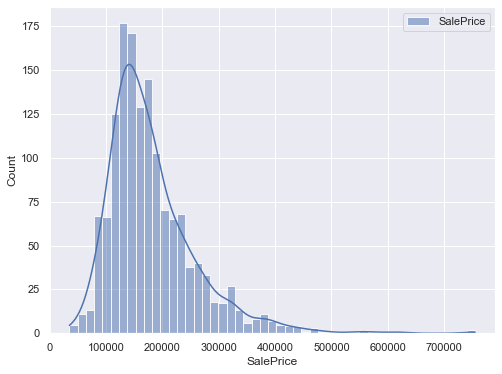

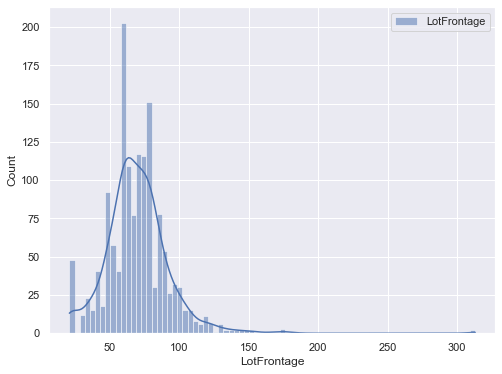

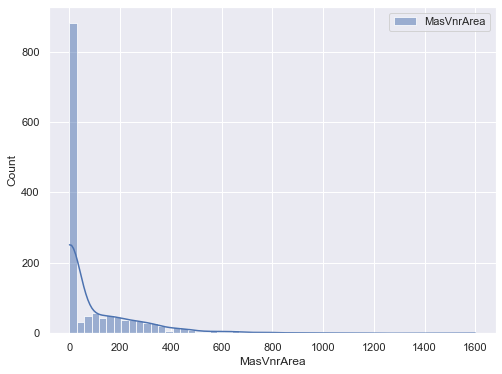

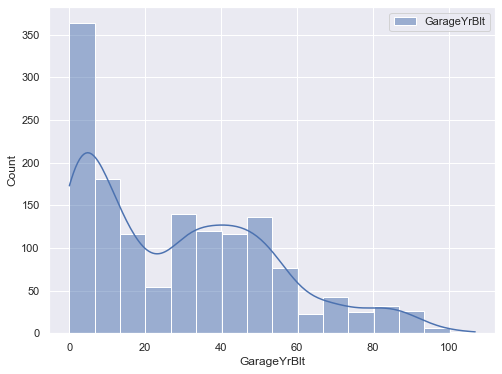

In [739]:
for feature in num_cols:
    data = df_train.copy()
    plt.rcParams['figure.figsize']=(8,6)
    #fig = plt.subplots(2,2, figsize=(10, 8))

    sns.set(style="darkgrid")

    sns.histplot(data= data, x=feature, label=feature,cbar = True , kde=True)
    
    plt.legend() 
    plt.show()

C:\Users\acer\anaconda3\envs\houseprediction\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MasVnrArea'>

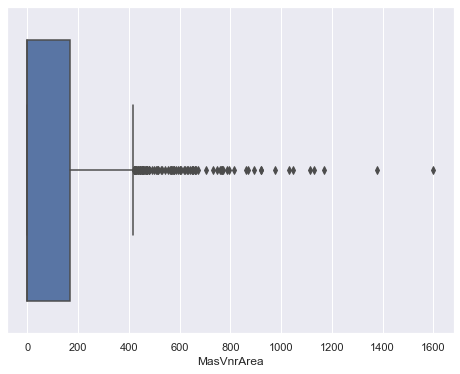

In [741]:
plt.rcParams['figure.figsize']=(8,6)
sns.boxplot(df_train['MasVnrArea'])

In [742]:
from scipy import stats
z=np.abs(stats.zscore(df_train.MasVnrArea))
print(z)

[0.50890051 0.574295   0.32099925 ... 0.574295   0.574295   0.574295  ]


In [743]:
df_train.shape

(1460, 81)

In [744]:
obj_cols = df_train.select_dtypes(include = 'object').columns


In [745]:
obj_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition', 'MasVnrType', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Alley',
       'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [746]:
# let first encode our categorical data 

#1 Label Encoding

data = df_train[obj_cols]
# TODO: create a LabelEncoder object and fit it to each feature in df

# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()

# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
df_le = data.apply(le.fit_transform)
print(df_le.shape)
df_le.head()


(1460, 43)


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond,Alley,FireplaceQu,PoolQC,Fence,MiscFeature
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,1,0,1,2,6,2,8,4,1,2,3,3,2,5,4,1,1,4,4,1,3,3,2,1
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,3,4,1,1,0,1,3,6,2,8,4,2,2,3,1,0,5,4,1,1,4,4,1,5,3,2,1
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,1,0,1,2,6,2,8,4,1,2,3,2,2,5,4,1,1,4,4,1,5,3,2,1
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,3,4,0,1,2,1,2,6,2,8,0,2,3,1,3,0,5,4,5,2,4,4,1,2,3,2,1
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,2,4,2,1,0,1,2,6,2,8,4,1,2,3,0,2,5,4,1,1,4,4,1,5,3,2,1


In [747]:
df_le.head(1)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond,Alley,FireplaceQu,PoolQC,Fence,MiscFeature
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,1,0,1,2,6,2,8,4,1,2,3,3,2,5,4,1,1,4,4,1,3,3,2,1


In [748]:
#backup 
#df_le.to_csv('dfcat_label_enc.csv', index=False)

In [749]:
df_train[num_cols].head(1)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage,MasVnrArea,GarageYrBlt
0,1,60,8450,7,5,5,5,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,14,208500,65.0,196.0,5.0


In [750]:
enc_df = pd.concat([df_train[num_cols], df_le], axis=1)

In [751]:
enc_df.head(1)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage,MasVnrArea,GarageYrBlt,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond,Alley,FireplaceQu,PoolQC,Fence,MiscFeature
0,1,60,8450,7,5,5,5,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,14,208500,65.0,196.0,5.0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,1,0,1,2,6,2,8,4,1,2,3,3,2,5,4,1,1,4,4,1,3,3,2,1


In [752]:
#backup
enc_df.to_csv('df_train_num_cat_merge_after_labelencoding.csv')

In [753]:
enc_df.shape

(1460, 81)

In [431]:
# to check OHE encoding (on label encoded)
df_dummies = pd.get_dummies(df_le, drop_first = True, columns=obj_cols)
df_dummies.shape    

# no. of coulums increased 27 to 155. 
# if we concat num cols then dimension space increase a lot.

(1460, 155)

In [432]:
df_dummies.head()

,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,Street_1,LotShape_1,LotShape_2,LotShape_3,LandContour_1,LandContour_2,LandContour_3,Utilities_1,LotConfig_1,LotConfig_2,LotConfig_3,LotConfig_4,LandSlope_1,LandSlope_2,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,Neighborhood_21,Neighborhood_22,Neighborhood_23,Neighborhood_24,Condition1_1,Condition1_2,Condition1_3,Condition1_4,Condition1_5,Condition1_6,Condition1_7,Condition1_8,Condition2_1,Condition2_2,Condition2_3,Condition2_4,Condition2_5,Condition2_6,Condition2_7,BldgType_1,BldgType_2,BldgType_3,BldgType_4,HouseStyle_1,HouseStyle_2,HouseStyle_3,HouseStyle_4,HouseStyle_5,HouseStyle_6,HouseStyle_7,RoofStyle_1,RoofStyle_2,RoofStyle_3,RoofStyle_4,RoofStyle_5,RoofMatl_1,RoofMatl_2,RoofMatl_3,RoofMatl_4,RoofMatl_5,RoofMatl_6,RoofMatl_7,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior1st_5,Exterior1st_6,Exterior1st_7,Exterior1st_8,Exterior1st_9,Exterior1st_10,Exterior1st_11,Exterior1st_12,Exterior1st_13,Exterior1st_14,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,Exterior2nd_5,Exterior2nd_6,Exterior2nd_7,Exterior2nd_8,Exterior2nd_9,Exterior2nd_10,Exterior2nd_11,Exterior2nd_12,Exterior2nd_13,Exterior2nd_14,Exterior2nd_15,ExterQual_1,ExterQual_2,ExterQual_3,ExterCond_1,ExterCond_2,ExterCond_3,ExterCond_4,Foundation_1,Foundation_2,Foundation_3,Foundation_4,Foundation_5,Heating_1,Heating_2,Heating_3,Heating_4,Heating_5,HeatingQC_1,HeatingQC_2,HeatingQC_3,HeatingQC_4,CentralAir_1,KitchenQual_1,KitchenQual_2,KitchenQual_3,Functional_1,Functional_2,Functional_3,Functional_4,Functional_5,Functional_6,PavedDrive_1,PavedDrive_2,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


# DATA PRE PROCESS OF test data using test.csv

In [433]:
df_test = pd.read_csv('test.csv')

In [434]:
df_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [435]:
df_test.shape   #without target i.e. SalePrice

(1459, 80)

In [437]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [438]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

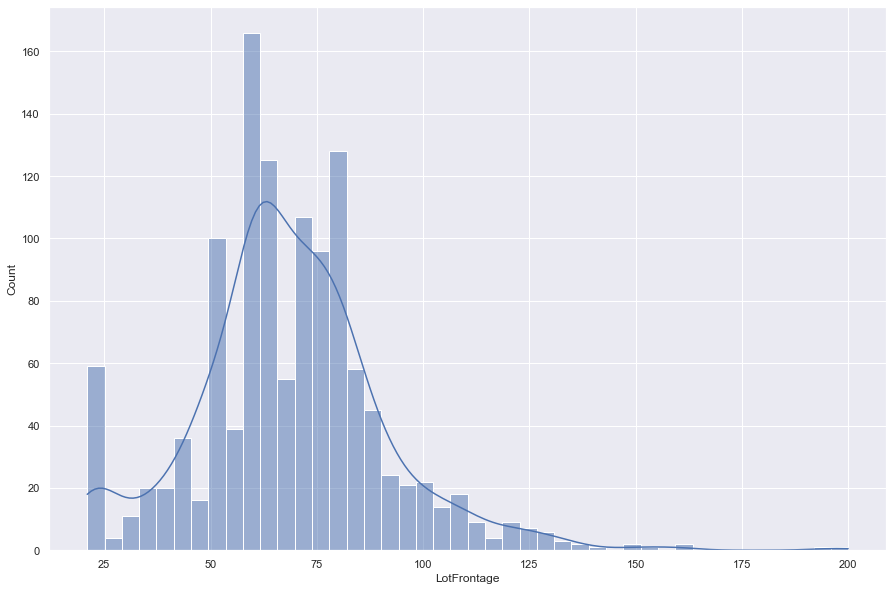

In [449]:
sns.histplot(df_test['LotFrontage'].dropna(), kde = True)

<AxesSubplot:xlabel='LotFrontage'>

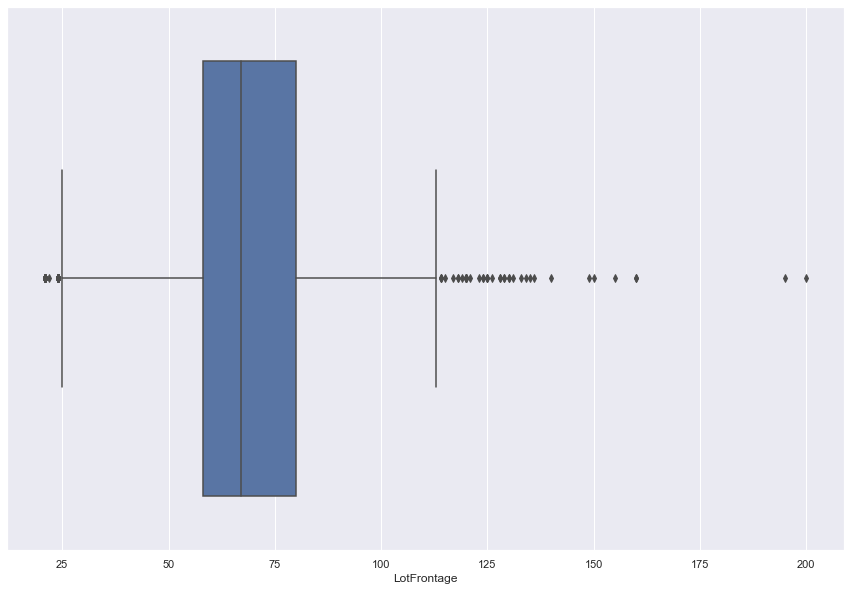

In [457]:

sns.boxplot(x=df_test["LotFrontage"])

In [460]:
num_f = df_test.select_dtypes(exclude = 'object').columns
cat_f = df_test.select_dtypes(include = 'object').columns

In [466]:
year_f = [feature for feature in df_test.columns if 'Yr' in feature or 'Year' in feature]
print(year_f)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [461]:
num_nan_f = [feature for feature in num_f if df_test[feature].isnull().sum()>0]
print(num_nan_f)

['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [463]:
cat_nan_f = [feature for feature in cat_f if df_test[feature].isnull().sum()>0]
print(cat_nan_f)

['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [538]:
df_test = df.copy(deep=True)

In [539]:
df_test['YearBuilt'] = df_test['YrSold'] - df_test['YearBuilt']
df_test['YearRemodAdd'] = df_test['YrSold'] - df_test ['YearRemodAdd']
df_test['GarageYrBlt'] = df_test['YrSold'] - df_test['GarageYrBlt']

df_test['YrSold'] = 2021 - df_test['YrSold']

In [540]:
df_test[year_f].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,49,49,49.0,11
1,52,52,52.0,11
2,13,12,13.0,11
3,12,12,12.0,11
4,18,18,18.0,11


60.0     133
80.0      68
70.0      63
50.0      60
75.0      52
        ... 
149.0      1
117.0      1
121.0      1
101.0      1
22.0       1
Name: LotFrontage, Length: 115, dtype: int64

In [541]:
df_test[num_nan_f].isnull().sum()

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [548]:
#applying random imputation
def impute_nan_num(df_test,variable):
    #df[variable+"_median"]=df[variable].fillna(median) if want to do both using single function
    df_test[variable]=df_test[variable]
    ##It will have the random sample to fill the na
    random_sample=df_test[variable].dropna().sample(df_test[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df_test[df_test[variable].isnull()].index
    df_test.loc[df_test[variable].isnull(),variable]=random_sample
for feature in ['LotFrontage', 'MasVnrArea']:
    impute_nan_num(df_test,feature)

In [550]:
df_test[num_nan_f].isnull().sum()

LotFrontage      0
MasVnrArea       0
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
GarageYrBlt     78
GarageCars       1
GarageArea       1
dtype: int64

In [552]:
#applying random imputation
def impute_nan_num(df_test,variable):
    #df[variable+"_median"]=df[variable].fillna(median) if want to do both using single function
    df_test[variable]=df_test[variable]
    ##It will have the random sample to fill the na
    random_sample=df_test[variable].dropna().sample(df_test[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df_test[df_test[variable].isnull()].index
    df_test.loc[df_test[variable].isnull(),variable]=random_sample

impute_nan_num(df_test,'GarageYrBlt')

In [554]:
df_test[num_nan_f].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
GarageYrBlt     0
GarageCars      1
GarageArea      1
dtype: int64

In [557]:
# filling Nan by mode
for feature in df_test[num_nan_f]:
    
    df_test[feature] = df_test[feature].fillna(df_test[feature].mode()[0])

In [558]:
df_test[num_nan_f].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

# categorical feature handling

In [560]:
len(cat_nan_f) 

22

In [562]:
df_test[cat_nan_f].isnull().sum()

MSZoning           4
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageFinish      78
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [569]:
#replacing cat_nan features whose null count is less than 100 using mode, new column created 
def impute_nan_cat(df_test,var,mode):
    mode = df_test[var].mode()[0]
    df_test[var]=df_test[var].fillna(mode)
for feature in cat_nan_f:
    if df_test[feature].isnull().sum()<100:
        impute_nan_cat(df_test,feature,df_test[feature].mode()[0])   

In [571]:
df_test[cat_nan_f].isnull().sum()

MSZoning           0
Alley           1352
Utilities          0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinType2       0
KitchenQual        0
Functional         0
FireplaceQu      730
GarageType         0
GarageFinish       0
GarageQual         0
GarageCond         0
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           0
dtype: int64

In [572]:
#Higher Nan values in count are replace with new var "Missing"


def impute_nan_cat2(df_test,variable):
    
    df_test[variable]=np.where(df_test[variable].isnull(),"Missing",df_test[variable])
    
for feature in ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']:
    impute_nan_cat2(df_test,feature)

In [573]:
df_test[cat_nan_f].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SaleType        0
dtype: int64

In [574]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,11,WD,Normal
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,11,WD,Normal
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,11,WD,Normal
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,11,WD,Normal
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,11,WD,Normal


### encoding of a cat features (label enc)  cat_f

In [581]:
cat_f

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [582]:
# let first encode our categorical data 

#1 Label Encoding

data = df_test[cat_f]
# TODO: create a LabelEncoder object and fit it to each feature in df

# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()

# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
dftest_le = data.apply(le.fit_transform)
print(dftest_le.shape)
dftest_le.head()

(1459, 43)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,2,1,1,3,3,0,4,0,12,1,2,0,2,1,0,10,12,2,3,4,1,3,3,3,4,3,0,4,1,3,3,6,3,1,2,3,4,2,2,3,1,8,4
1,3,1,1,0,3,0,0,0,12,2,2,0,2,3,0,11,13,1,3,4,1,3,3,3,0,5,0,4,1,3,2,6,3,1,2,3,4,2,2,2,0,8,4
2,3,1,1,0,3,0,4,0,8,2,2,0,4,1,0,10,12,2,3,4,2,2,3,3,2,5,0,2,1,3,3,6,5,1,0,3,4,2,2,3,1,8,4
3,3,1,1,0,3,0,4,0,8,2,2,0,4,1,0,10,12,1,3,4,2,3,3,3,2,5,0,0,1,3,2,6,2,1,0,3,4,2,2,2,1,8,4
4,3,1,1,0,1,0,4,0,22,2,2,4,2,1,0,6,6,2,2,4,2,2,3,3,0,5,0,0,1,3,2,6,3,1,1,3,4,2,2,2,1,8,4


In [587]:
df_test.shape

(1459, 80)

In [589]:
# now dropping the non encoded object features then concat the encoded
dfback = df_test.copy()
df_test = df_test.drop(cat_f, axis =1)

In [591]:
df_test.shape

(1459, 37)

In [592]:
# Now concat columns from dftest_le to df_test

df_test = pd.concat([df_test, dftest_le], axis =1)

In [594]:

print(df_test.shape)

(1459, 80)


# Applying Random forest

###### Here, we will split training dataset data in to train and test, (we can use this test data in prediction and checking accuracy if future data
###### not availabe
##### then we can predict the future outcome using testing dataset

In [6]:
train_data = pd.read_csv('df_train_num_cat_merge_after_labelencoding.csv')
test_data =  pd.read_csv('df_test_labelencoded.csv')

In [8]:
#capture feature and target from train_data.

X = train_data.drop(['Id','SalePrice'], axis = 1)
y = train_data[['SalePrice']]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature Scaling(not using in RF )
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train.values.ravel())
y_pred = regressor.predict(X_test)

In [21]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 17423.653767123287
Mean Squared Error: 968774527.3670983
Root Mean Squared Error: 31125.143009584684


In [22]:
#lets predict future data
y_pred = regressor.predict(test_data)


In [23]:
print(y_pred)

[253787.08 263892.08 262158.91 ... 259591.23 274215.13 260811.75]


In [27]:
my_submission = pd.DataFrame({'SalePrice': y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [30]:
my_submission.head()

,SalePrice
0,253787.08
1,263892.08
2,262158.91
3,264343.82
4,257168.87


In [3]:
sam=pd.read_csv('sample_submission.csv')

In [4]:
sam.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [5]:
submission = pd.read_csv('submission.csv')


In [7]:
submission = pd.concat([test_data['Id'], submission['SalePrice']], axis =1)

In [8]:
submission.head()

,Id,SalePrice
0,1461,253787.08
1,1462,263892.08
2,1463,262158.91
3,1464,264343.82
4,1465,257168.87


In [9]:
submission.to_csv('submission.csv', index = False)